#Ejercicio 1 
##Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea
como máximo 10.

1. Identificación de las variables: Se tendran Dos variables aleatorias independientes  $x_{1}$, $x_{2}$ simulando a las 2 personas participantes.

2. Se especifica que $x_{1}$, $x_{2}$ $\sim$ $U[0,30]$

3. Generando  $x_{1}$ $\sim U(0,30)$ y $x_{2} \sim(0,30)$

4. El modelo del sistema consistira en comparar el tiempo de llegada de las persona 1 y de la persona 2, si la diferencia de tiempo de las personas es menor a 10 min $(|x_1-x_2|\leq 10)$ se toma como un evento positivo.

In [132]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [125]:
def llegada():
    exito=0 
    x_1=round(random.uniform(0, 30),2) #Regresa una v.a uniforme entre 0 y 30 redondeado a 2 digitos decimales.
    x_2=round(random.uniform(0, 30),2) #simulando que es el tiempo medido en minutos con segundos.
    if abs(x_1-x_2)<=10:
        exito+=1 #Si el tiempo de espera entre las personas esta entre 0 y 10 min. entonces se toma el experimento como "exito".
    return exito

In [144]:
llegada()

0

5. Diseñe el experimento. 

Para estimar la probabilidad de que el tiempo de llegada entre la persona 1 y la persona 2 sea menor o igual a 10 min, ejecutamos $n$
veces la función anterior y calculamos de manera acumulativa la probabilidad de llegada.

In [147]:
def prob_llegada(n):                    
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    exito1 = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que 
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        exito1 += llegada()
        prob.append(exito1/(i+1))
    return prob

In [208]:
X = prob_llegada(1500)                # Asignamos valores a n y realizamos el experimento

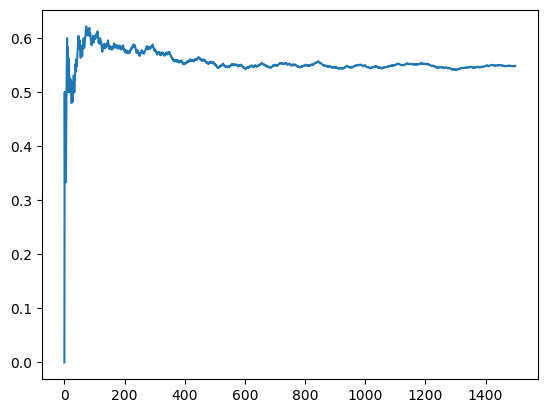

In [209]:
plt.plot(X)       # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [197]:

print(np.mean(X), np.std(X))

0.5666501944134841 0.06393674032484253


6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente código. 

In [157]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_llegada(500)
        lista.append(np.mean(s))
    return lista

In [158]:

Y=modelo(120)

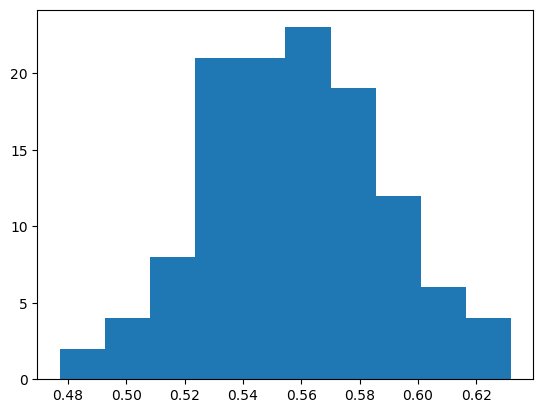

In [159]:
plt.hist(Y)
plt.show()

In [191]:
print(np.mean(Y), np.std(Y))

0.5580234211783356 0.029800250132777432


7. El intervalo de confianza 

In [190]:
np.mean(Y)
y1=np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50)
y2=np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

if y1<np.mean(Y)<y2:
    print(y1, "<",np.mean(Y),"<",y2)
    print("Se acepta la hipotesis con una confiabilidad del 95%")
else:
        print("No cumple la hipótesis nula")

0.5497632132699583 < 0.5580234211783356 < 0.5662836290867129
Se acepta la hipotesis con una confiabilidad del 95%
